DATA ANALYSIS PROJECT ON COVID-19.

In this project, I will be employing  data science and analytics skills to collect data, explore the data, perform analysis, create visualizations, and generate insights on the effect of covid, the death rate.

IMPORT LIBRARIES

In [2]:
import requests
import numpy as np
import os
import glob
import urllib.request
import pandas as pd
import csv
import io
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

WEB SCRAPPING NCDC COVID19 CASES

In [3]:
url='https://covid19.ncdc.gov.ng/'

In [4]:
headers={ 'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.5112.81 Safari/537.36 Edg/104.0.1293.54"
    
}

In [5]:
raw_ncdc_page=requests.get(url,{'headers':headers})

In [6]:
ncdc_page = BeautifulSoup(raw_ncdc_page.text, 'html.parser')

In [7]:
tb_confirmedcases=ncdc_page.find_all('div', {'class': "table-responsive"})[0].find('table')

In [8]:
csv_from_html = pd.read_html(str(tb_confirmedcases))[0].to_csv(index=False, header=True)

In [9]:
ncdc_data=pd.read_csv(io.StringIO(csv_from_html))

In [10]:
ncdc_data.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,104157,1014,102372,771
1,FCT,29504,15,29240,249
2,Rivers,18093,44,17894,155
3,Kaduna,11615,12,11514,89
4,Oyo,10336,2,10132,202


In [11]:
ncdc_data.to_csv('Covid19 Nigeria Cases', index=False)

In [12]:
df_ncdc_data=pd.read_csv('Covid19 Nigeria Cases')

GLOBAL COVID19 CASES

John Hopkins Data Obtained from git repository

In [13]:
path="https://github.com/CSSEGISandData/COVID-19/blob/master/archived_data/archived_daily_case_updates/01-21-2020_2200.csv"

In [14]:
path="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [15]:
daily_confirmed_cases=pd.read_csv(path)

In [16]:
Daily_Recovered_cases=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [17]:
daily_confirmed_cases=pd.read_csv('Daily_Comfirmed_global_cases')

In [18]:
Daily_death_cases=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

In [19]:
daily_confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,190643,191040,191247,191585,191967,191967,191967,192463,192906,193004
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,326077,326181,326787,327232,327607,327961,328299,328515,328571,329017
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,269805,269894,269971,270043,270097,270145,270175,270194,270235,270272
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,45975,45975,45975,46027,46027,46027,46027,46027,46027,46027
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,697447,698384,698384,698384,698384,698384,698384,698384,698384,701739
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11915,11915,11917,11919,11922,11922,11925,11925,11925,11926
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,332264,332527,332527,332648,332710,332710,332710,332710,332822,332822


In [20]:
daily_confirmed_cases.dropna()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,200570,200828,201089,201338,201579,201789,201956,202107,202308,202543
10,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3387881,3393432,3400100,3405870,3411500,3416226,3420381,3423756,3428015,3433433
11,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,94893,95029,95156,95239,95344,95431,95483,95549,95656,95765
12,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,1593614,1590535,1593156,1595372,1597470,1599323,1600452,1601676,1604082,1606370
13,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,746910,747842,747842,749665,750458,751084,751530,752136,752904,752904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,Isle of Man,United Kingdom,54.236100,-4.548100,0,0,0,0,0,0,...,37794,37794,37794,38008,38008,38008,38008,38008,38008,38008
270,Jersey,United Kingdom,49.213800,-2.135800,0,0,0,0,0,0,...,58536,58733,58733,58733,58733,58890,58890,58890,58890,58890
271,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,1106,1106,1106,1120,1120,1120,1126,1126,1126,1145
272,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,4,4,4,7,7,7,7,7,7,7


DAILY RECORVERED CASES FROM GIT REPOSITORY

In [21]:
Daily_Recovered_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/9/22,11/10/22,11/11/22,11/12/22,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22,11/18/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


DAILY DEATH CASES

EXTERNAL DATA

In [22]:
df_covid_external_cases = pd.DataFrame(pd.read_csv('covid_external.csv'))

dff1=df1.to_csv('Daily recovered cases', index=False) -- not necessary

In [23]:
Daily_death_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/9/22,11/10/22,11/11/22,11/12/22,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22,11/18/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7829,7829,7829,7829,7829,7829,7829,7830,7830,7830
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3593,3593,3593,3593,3593,3594,3594,3594,3594,3594
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,155,155,155,155,155,155,155,156,156,156
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4017,4017,4017,4017,4017,4017,4017,4017,4017,4017


In [24]:
df_covidnig_cases=df = pd.DataFrame(pd.read_csv('covidnig.csv'))

In [25]:
df_budget_data= pd.DataFrame(pd.read_csv('Budget data.csv'))

In [26]:
df_RealGDP_csv= pd.DataFrame(pd.read_csv('RealGDP.csv'))

VIEWING DATA

In [27]:
df_covidnig_cases.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [28]:
df_covidnig_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [29]:
df_covidnig_cases.describe()

,No. of Deaths
count,37.000000
mean,33.000000
std,41.797794
min,2.000000
25%,11.000000
50%,21.000000
75%,36.000000
max,236.000000


DATA CLEANING AND PREPARATION

RENAMING COLUMN OF THE SCRAPPED DATA

In [30]:
df_covidnig_cases.set_axis(['State', 'Confirmed Cases', 'Admission Cases', 'Recovered Cases' ,'Death Cases'], axis=1, inplace=True)

REMOVAL OF COMMA.

In [31]:
df_covidnig_cases['Confirmed Cases']=df_covidnig_cases['Confirmed Cases'].str.replace(',','')

In [32]:
df_covidnig_cases['Admission Cases']=df_covidnig_cases['Admission Cases'].str.replace(',','')

In [33]:
df_covidnig_cases['Recovered Cases']=df_covidnig_cases['Recovered Cases'].str.replace(',','')

In [34]:
df_covidnig_cases['Death Cases'] = df_covidnig_cases['Death Cases'].astype(str).astype(int)


In [35]:
df_covidnig_cases['Admission Cases'] = df_covidnig_cases['Admission Cases'].astype(str).astype(int)

In [36]:
df_covidnig_cases['Recovered Cases'] = df_covidnig_cases['Recovered Cases'].astype(str).astype(int)

In [37]:
df_covidnig_cases.dtypes

State              object
Confirmed Cases    object
Admission Cases     int32
Recovered Cases     int32
Death Cases         int32
dtype: object

df['object_column'] = df['int_column'].astype(str).astype(int)


In [38]:
 Daily_confirmed_cases_Nigeria=daily_confirmed_cases[daily_confirmed_cases['Country/Region']=='Nigeria']

In [39]:
Daily_confirmed_cases_Nigeria

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
204,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,262912,262912,263090,263090,263322,263322,263407,263407,263407,263526


In [40]:
DccN=Daily_confirmed_cases_Nigeria.drop(columns=(['Lat', 'Long','Province/State','Country/Region'])).transpose().rename(columns={204:'Confirmed cases'})

In [41]:
DccN

,Confirmed cases
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
8/26/22,263322
8/27/22,263407
8/28/22,263407
8/29/22,263407


In [42]:
Daily_Recovered_cases_Nigeria=Daily_Recovered_cases[Daily_Recovered_cases['Country/Region']=='Nigeria']

In [43]:
DrcN=Daily_Recovered_cases_Nigeria.drop(columns=(['Lat', 'Long','Province/State','Country/Region'])).transpose().rename(columns={191:'Recovered cases'})

In [44]:
DrcN

,Recovered cases
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
11/14/22,0
11/15/22,0
11/16/22,0
11/17/22,0


In [45]:
Daily_death_cases_Nigeria=Daily_death_cases[Daily_death_cases['Country/Region']=='Nigeria']

In [46]:
DdcN=Daily_death_cases_Nigeria.drop(columns=(['Lat', 'Long','Province/State','Country/Region'])).transpose().rename(columns={206:'Death cases'})

In [47]:
DdcN

,Death cases
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
11/14/22,3155
11/15/22,3155
11/16/22,3155
11/17/22,3155


In [57]:
df_covidnig_cases

,State,Confirmed Cases,Admission Cases,Recovered Cases,Death Cases
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


STEP 5 ANALYSIS

In [58]:
ncdc_data

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,104157,1014,102372,771
1,FCT,29504,15,29240,249
2,Rivers,18093,44,17894,155
3,Kaduna,11615,12,11514,89
4,Oyo,10336,2,10132,202
5,Plateau,10331,4,10252,75
6,Edo,7927,4,7601,322
7,Ogun,5810,11,5717,82
8,Delta,5808,526,5170,112
9,Kano,5344,97,5120,127


No. of Cases (on admission

<AxesSubplot:xlabel='States Affected'>

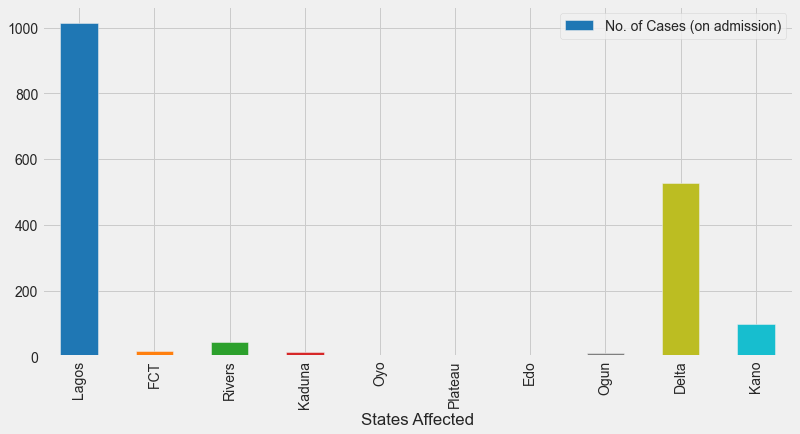

In [59]:
ncdc_data.head(10).plot.bar(x='States Affected', y='No. of Cases (on admission)',figsize=(12,6), color=sns.color_palette("tab10"))


Lagos has the highest number of cases on admission followed by Delta, then FCT as the third state that has the highest number of admission cases.

No of LAb Confirmed cases

<AxesSubplot:xlabel='States Affected'>

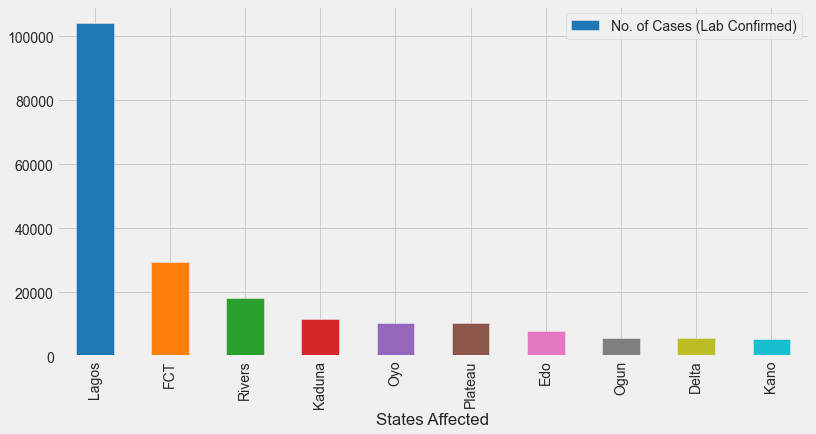

In [60]:
ncdc_data.head(10).plot.bar(x='States Affected', y='No. of Cases (Lab Confirmed)',figsize=(12,6), color=sns.color_palette("tab10"))

Lagos has the highest number of confirmed cases, followed by FCT. Rivers is the third highest cases after which Kaduna follows.

No. Discharged

<AxesSubplot:xlabel='States Affected'>

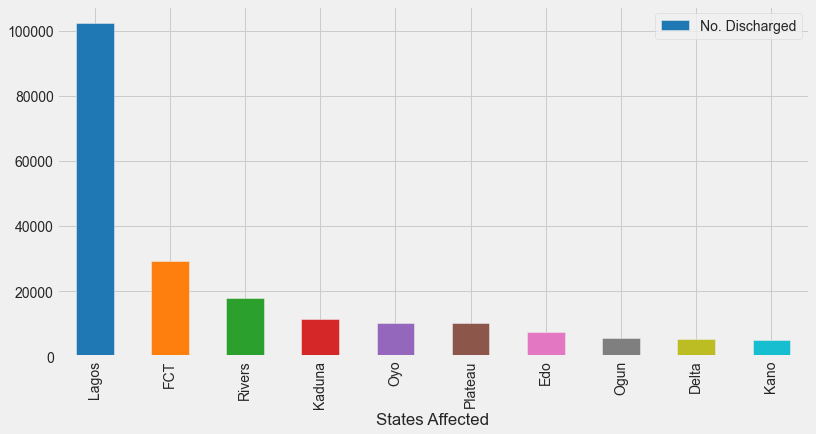

In [61]:
ncdc_data.head(10).plot.bar(x='States Affected', y='No. Discharged',figsize=(12,6), color=sns.color_palette("tab10"))


The top 10 states in the discharged  cases in Nigeria are Lagos, FCT, Kaduna, Edo, Plateau, Rivers,Oyo, Ogun, Delta and Kano.

Top 10 death cases

<AxesSubplot:xlabel='States Affected'>

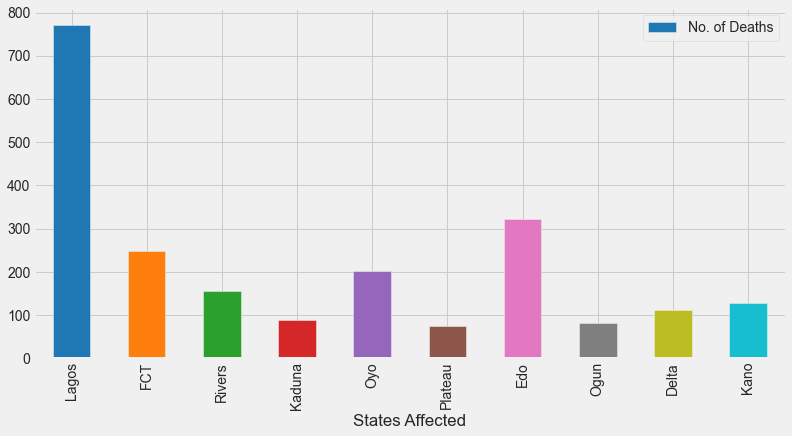

In [62]:
ncdc_data.head(10).plot.bar(x='States Affected', y='No. of Deaths',figsize=(12,6), color=sns.color_palette("tab10"))

Lagos has the highest number of death cases, followed by Edo and FCT has the third highest death cases. Kano and Rivers are competing for the 4th and 5th death cases

In [63]:
df_covidnig_cases.dtypes

State              object
Confirmed Cases    object
Admission Cases     int32
Recovered Cases     int32
Death Cases         int32
dtype: object

In [64]:
df_covidnig_cases['Confirmed Cases'] = df_covidnig_cases['Confirmed Cases'].astype('int')


<AxesSubplot:xlabel='State'>

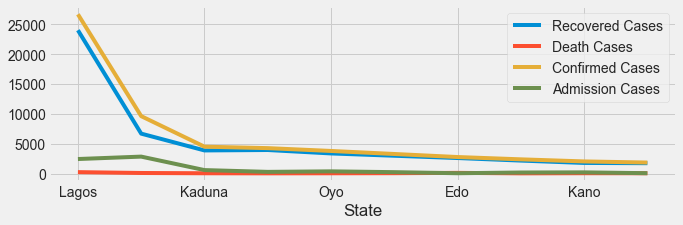

In [65]:
df_covidnig_cases.head(10).plot(kind='line', x= 'State', y=['Recovered Cases','Death Cases','Confirmed Cases','Admission Cases'], figsize=(10,3))

From the plotline above,Lagos state shows the highest records in recorvered,confirmed and admitted cases. 

[Text(0.5, 0, 'States'), Text(0, 0.5, 'Cases')]

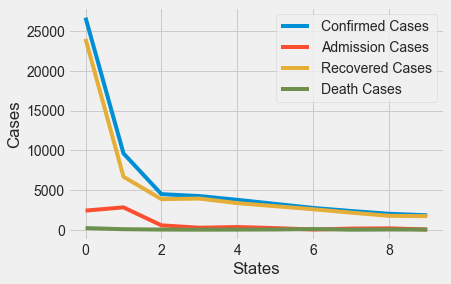

In [67]:
df_covidnig_cases.head(10).plot().set (xlabel="States", ylabel="Cases")

No. of Cases (Lab Confirmed)	No. of Cases (on admission)	No. Discharged	No. of Deaths

Obtaining the daily infection rate..

In [68]:
daily_confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,190643,191040,191247,191585,191967,191967,191967,192463,192906,193004
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,326077,326181,326787,327232,327607,327961,328299,328515,328571,329017
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,269805,269894,269971,270043,270097,270145,270175,270194,270235,270272
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,45975,45975,45975,46027,46027,46027,46027,46027,46027,46027
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,697447,698384,698384,698384,698384,698384,698384,698384,698384,701739
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11915,11915,11917,11919,11922,11922,11925,11925,11925,11926
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,332264,332527,332527,332648,332710,332710,332710,332710,332822,332822


In [69]:
daily_confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,190643,191040,191247,191585,191967,191967,191967,192463,192906,193004
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,326077,326181,326787,327232,327607,327961,328299,328515,328571,329017
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,269805,269894,269971,270043,270097,270145,270175,270194,270235,270272
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,45975,45975,45975,46027,46027,46027,46027,46027,46027,46027
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,697447,698384,698384,698384,698384,698384,698384,698384,698384,701739
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11915,11915,11917,11919,11922,11922,11925,11925,11925,11926
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,332264,332527,332527,332648,332710,332710,332710,332710,332822,332822


In [70]:
daily_confirmed_cases.max()

Country/Region    Zimbabwe
Lat                71.7069
Long               178.065
1/22/20                444
1/23/20                444
                    ...   
8/26/22           94176471
8/27/22           94189557
8/28/22           94196390
8/29/22           94285683
8/30/22           94379514
Length: 955, dtype: object

In [71]:
Indexmodified = daily_confirmed_cases

In [72]:
Indexmodified

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,190643,191040,191247,191585,191967,191967,191967,192463,192906,193004
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,326077,326181,326787,327232,327607,327961,328299,328515,328571,329017
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,269805,269894,269971,270043,270097,270145,270175,270194,270235,270272
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,45975,45975,45975,46027,46027,46027,46027,46027,46027,46027
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,697447,698384,698384,698384,698384,698384,698384,698384,698384,701739
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11915,11915,11917,11919,11922,11922,11925,11925,11925,11926
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,332264,332527,332527,332648,332710,332710,332710,332710,332822,332822


In [73]:
Indexmodified.drop("Lat",  axis=1, inplace=True)

In [74]:
Indexmodified.drop("Long",  axis=1, inplace=True)

In [75]:
Indexmodified

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,190643,191040,191247,191585,191967,191967,191967,192463,192906,193004
1,NaN,Albania,0,0,0,0,0,0,0,0,...,326077,326181,326787,327232,327607,327961,328299,328515,328571,329017
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,269805,269894,269971,270043,270097,270145,270175,270194,270235,270272
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,45975,45975,45975,46027,46027,46027,46027,46027,46027,46027
4,NaN,Angola,0,0,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,0,0,0,0,0,0,0,0,...,697447,698384,698384,698384,698384,698384,698384,698384,698384,701739
281,NaN,Winter Olympics 2022,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,0,0,0,0,0,0,0,0,...,11915,11915,11917,11919,11922,11922,11925,11925,11925,11926
283,NaN,Zambia,0,0,0,0,0,0,0,0,...,332264,332527,332527,332648,332710,332710,332710,332710,332822,332822


In [76]:
Indexmodified.drop("Province/State",  axis=1, inplace=True)

In [77]:
Indexmodified.drop(Indexmodified.iloc[:, 1:938], inplace=True, axis=1)

Indexmodified.set_index('Country/Region')

Indexmodified.dtypes

In [78]:
Indexmodified.drop("Country/Region",  axis=1, inplace=True)

In [79]:
Ind=Indexmodified.diff(periods=1,axis=0)

In [80]:
Ind

,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,133360.0,133572.0,133819.0,134987.0,135301.0,135434.0,135141.0,135540.0,135647.0,135640.0,135994.0,136332.0,136052.0,135665.0,136013.0
2,-53456.0,-53809.0,-54273.0,-55591.0,-56005.0,-56272.0,-56287.0,-56816.0,-57189.0,-57510.0,-57816.0,-58124.0,-58321.0,-58336.0,-58745.0
3,-223482.0,-223498.0,-223581.0,-223675.0,-223756.0,-223830.0,-223919.0,-223996.0,-224016.0,-224070.0,-224118.0,-224148.0,-224167.0,-224208.0,-224245.0
4,56737.0,56661.0,56661.0,56661.0,56661.0,56661.0,56661.0,56661.0,56609.0,56609.0,56609.0,56609.0,56609.0,56609.0,56609.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,-10673015.0,-10675829.0,-10679124.0,-10682107.0,-10684811.0,-10686372.0,-10687632.0,-10690884.0,-10694475.0,-10697821.0,-10701016.0,-10703213.0,-10704918.0,-10707327.0,-10707213.0
281,-696912.0,-696912.0,-696912.0,-696912.0,-696912.0,-696912.0,-697849.0,-697849.0,-697849.0,-697849.0,-697849.0,-697849.0,-697849.0,-697849.0,-701204.0
282,11368.0,11368.0,11379.0,11380.0,11380.0,11380.0,11380.0,11382.0,11384.0,11387.0,11387.0,11390.0,11390.0,11390.0,11391.0
283,320111.0,320361.0,320350.0,320349.0,320349.0,320349.0,320612.0,320610.0,320729.0,320788.0,320788.0,320785.0,320785.0,320897.0,320896.0


In [81]:
Ind.drop(Ind.loc[0:273].index, inplace=True)

In [82]:
Ind

,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
274,23414475.0,23454436.0,23454436.0,23454436.0,23454436.0,23454436.0,23454436.0,23454428.0,23454428.0,23486516.0,23486516.0,23486516.0,23486516.0,23486516.0,23486516.0
275,-22445562.0,-22485523.0,-22485523.0,-22485523.0,-22485523.0,-22485523.0,-22483482.0,-22483482.0,-22483482.0,-22515570.0,-22515570.0,-22515570.0,-22515570.0,-22513715.0,-22513715.0
276,-731678.0,-731659.0,-731641.0,-731626.0,-731610.0,-731598.0,-733628.0,-733614.0,-733595.0,-733577.0,-733562.0,-733562.0,-733562.0,-735417.0,-735376.0
277,-231833.0,-231852.0,-231870.0,-231868.0,-231884.0,-231896.0,-231907.0,-231921.0,-231933.0,-231951.0,-231959.0,-231959.0,-231959.0,-231950.0,-231991.0
278,528928.0,529043.0,529043.0,529207.0,529552.0,529635.0,529830.0,529938.0,529931.0,530030.0,530255.0,530415.0,530468.0,530488.0,530488.0
279,10829781.0,10832480.0,10835775.0,10838577.0,10840936.0,10842414.0,10844416.0,10847560.0,10851151.0,10854398.0,10857361.0,10859398.0,10861050.0,10863430.0,10866671.0
280,-10673015.0,-10675829.0,-10679124.0,-10682107.0,-10684811.0,-10686372.0,-10687632.0,-10690884.0,-10694475.0,-10697821.0,-10701016.0,-10703213.0,-10704918.0,-10707327.0,-10707213.0
281,-696912.0,-696912.0,-696912.0,-696912.0,-696912.0,-696912.0,-697849.0,-697849.0,-697849.0,-697849.0,-697849.0,-697849.0,-697849.0,-697849.0,-701204.0
282,11368.0,11368.0,11379.0,11380.0,11380.0,11380.0,11380.0,11382.0,11384.0,11387.0,11387.0,11390.0,11390.0,11390.0,11391.0
283,320111.0,320361.0,320350.0,320349.0,320349.0,320349.0,320612.0,320610.0,320729.0,320788.0,320788.0,320785.0,320785.0,320897.0,320896.0


Ind.transpose().plot(figsize=(14,8),)

y = confimed_data['Cases'].diff()
sns.lineplot(x="Date", y=y, data=confimed_data)

Text(0, 0.5, 'Ind')

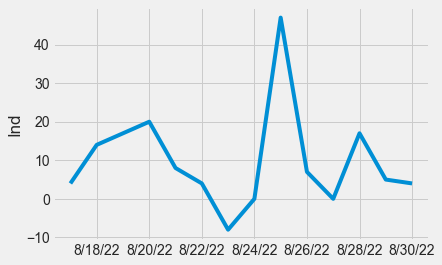

In [83]:
ax = Ind.sum(axis='rows').diff(periods=1).plot(grid=True)
ax.set_ylabel('Ind')

In [84]:
Ind.max().max()

23486516.0

In [85]:
Dailymaxcase=Ind.max()

In [86]:
Dailymaxcase= pd.DataFrame(Dailymaxcase).reset_index()
Dailymaxcase.columns = ['Date', 'Values']


In [87]:
Dailymaxcase

,Date,Values
0,8/16/22,23414475.0
1,8/17/22,23454436.0
2,8/18/22,23454436.0
3,8/19/22,23454436.0
4,8/20/22,23454436.0
5,8/21/22,23454436.0
6,8/22/22,23454436.0
7,8/23/22,23454428.0
8,8/24/22,23454428.0
9,8/25/22,23486516.0


In [88]:
Dailymaxcase.max().Values

23486516.0

In [89]:
Dailymaxcase.max().Date

'8/30/22'

Relationship between the External dataset and the NCDC COVID-19 dataset

In [90]:
df_covid_external_cases.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [91]:
ncdc_data.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,104157,1014,102372,771
1,FCT,29504,15,29240,249
2,Rivers,18093,44,17894,155
3,Kaduna,11615,12,11514,89
4,Oyo,10336,2,10132,202


In [92]:
ncd1=ncdc_data

In [93]:
ncd2=df_covid_external_cases

In [94]:
ncd1.set_axis(['states','No. of Cases (Lab Confirmed)','No. of Cases (on admission)','No. Discharged','No. of Deaths'], axis=1, inplace=True)

In [95]:
ncd1

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,104157,1014,102372,771
1,FCT,29504,15,29240,249
2,Rivers,18093,44,17894,155
3,Kaduna,11615,12,11514,89
4,Oyo,10336,2,10132,202
5,Plateau,10331,4,10252,75
6,Edo,7927,4,7601,322
7,Ogun,5810,11,5717,82
8,Delta,5808,526,5170,112
9,Kano,5344,97,5120,127


In [96]:
Combined_ext_ncdc=pd.merge(ncd1,ncd2, on='states')

In [97]:
Combined_ext_ncdc

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,104157,1014,102372,771,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,29504,15,29240,249,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,18093,44,17894,155,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11615,12,11514,89,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Oyo,10336,2,10132,202,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
5,Plateau,10331,4,10252,75,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
6,Edo,7927,4,7601,322,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,5810,11,5717,82,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Delta,5808,526,5170,112,South South,6303000,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08
9,Kano,5344,97,5120,127,North West,14726000,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87


In [98]:
Top10comb_conf_vindex=Combined_ext_ncdc.nlargest(10, ['No. of Cases (Lab Confirmed)', 'Overall CCVI Index'])

y=('No. of Cases (Lab Confirmed', 'Overall CCVI Index')
sns.lineplot(x="states", y=y, data=Top10comb_conf_vindex) 

df_covidnig_cases = df_covidnig_cases.sort_values(by='E', ascending=False)

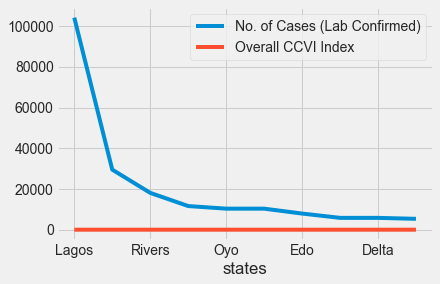

In [99]:
Top10comb_conf_vindex.plot(x="states", y=["No. of Cases (Lab Confirmed)", "Overall CCVI Index"])
plt.show()

The overall vulnerability index is  the same for most of the states because the  graph is flat. For the lab confirmed cases, the graph goes from  top to bottom.  

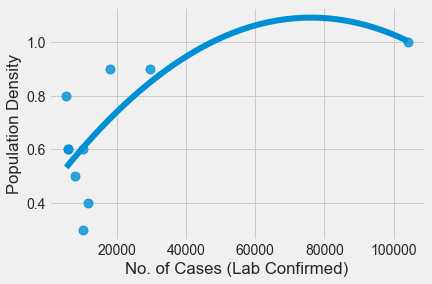

In [100]:
reg_Top10comb_conf_vindex= sns.regplot(x="No. of Cases (Lab Confirmed)", y="Population Density", data=Top10comb_conf_vindex,
                 scatter_kws={"s": 80},
                 order=2, ci=None)

[Text(0.5, 0, 'states'), Text(0, 0.5, 'No. of Deaths')]

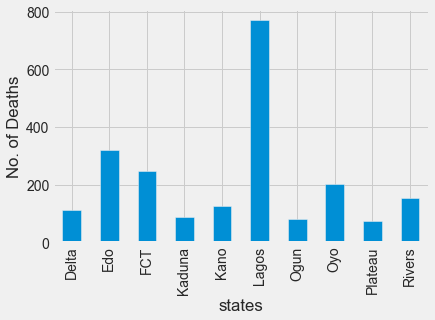

In [101]:
Combined_ext_ncdc.head(10).groupby(['states'])['No. of Deaths'].mean().plot.bar().set (xlabel="states", ylabel="No. of Deaths")

From the charts above showing the top ten states, the death is higheest in Lagos, followed by Edo, FCT  and Oyo states.  

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'No. of Deaths')]

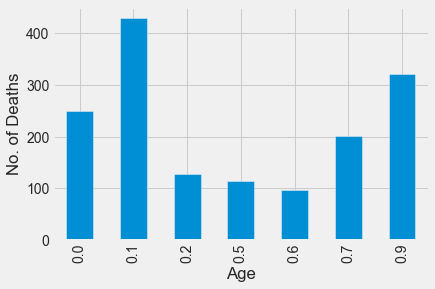

In [102]:
Combined_ext_ncdc.head(10).groupby(['Age'])['No. of Deaths'].mean().plot.bar().set (xlabel="Age", ylabel="No. of Deaths")

Checking the table, and comparing it with the graph above, the number of death is higher with age 0.1 followed by age 0.9.

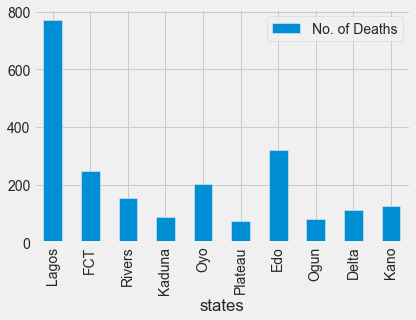

In [105]:
Top10comb_conf_vindex.plot.bar(x="states", y=["No. of Deaths"])
plt.show()

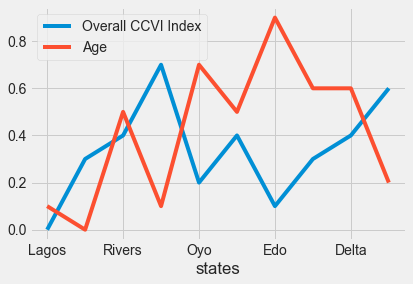

In [87]:
Top10comb_conf_vindex.plot(x="states", y=["Overall CCVI Index", "Age"])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

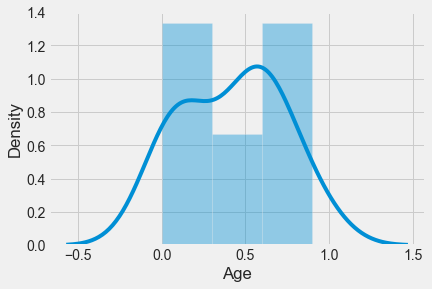

In [106]:
sns.distplot(Top10comb_conf_vindex['Age'])

<AxesSubplot:xlabel='Overall CCVI Index', ylabel='Density'>

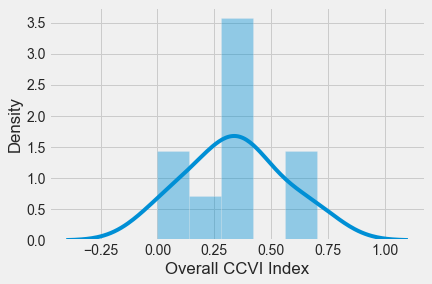

In [107]:
sns.distplot(Top10comb_conf_vindex['Overall CCVI Index'])

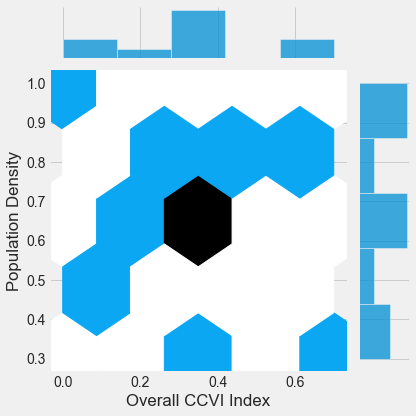

In [108]:
sns.jointplot(x='Overall CCVI Index', y='Population Density', data=Top10comb_conf_vindex, kind='hex')

In  plot above, we have high vulnerability index at 0.4 with a population density of 0.6 and 0.7

In [109]:
GDP=df_RealGDP_csv

In [110]:
GDP

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [111]:
gdp_value=pd.melt(GDP, id_vars='Year', value_vars=['Q1','Q2','Q3','Q4'])

In [112]:
gdp_value

,Year,variable,value
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


In [113]:
Q2=gdp_value[(gdp_value['Year']==2020) & (gdp_value['variable']=='Q2')].value

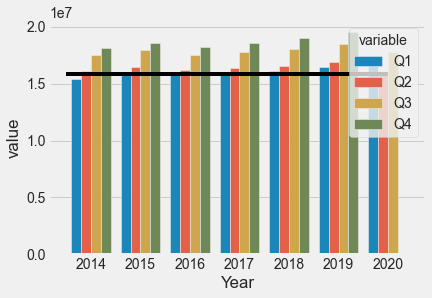

In [114]:
ax=sns.barplot(data=gdp_value, x='Year', y='value', hue='variable')

ax.hlines( y=Q2, xmin= 6, xmax=-0.5, colors='black')

2020 has the lowest gdp in Q2 across the years.